In [1]:
import pandas as pd
import numpy as np

In [17]:
pip list

Package                   Version
------------------------- ------------------
absl-py                   2.1.0
aiohttp                   3.9.1
aiosignal                 1.3.1
alembic                   1.13.1
ansicon                   1.89.0
anyio                     3.5.0
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.0.5
async-lru                 2.0.4
async-timeout             4.0.3
attrs                     23.1.0
Babel                     2.11.0
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    4.1.0
blessed                   1.20.0
blis                      0.7.11
boto3                     1.34.28
botocore                  1.34.28
Brotli                    1.1.0
cached-property           1.5.2
cachetools                5.3.2
catalogue                 2.0.10
certifi                   2023.11.17
cffi                      1.16.0
chardet                   3.0.4
chars

In [2]:
rec_data = pd.read_csv("recomendations.csv", usecols = ['User ID','Document ID', 'Value'])
rec_data = rec_data.rename(columns={'User ID' : 'UserID', 'Document ID': 'DocID'})
rec_data

,UserID,DocID,Value
0,954,76,0.113238
1,954,67,0.000000
2,954,71,0.113238
3,954,78,0.000000
4,3,5556,0.120768
...,...,...,...
94451,1994,6249,1.000000
94452,1994,5524,0.286347
94453,1994,5562,0.109750
94454,1087,5524,0.095725


1)	Берем список рекомендаций для user (W шт)

In [3]:
get_rec_by_userid = rec_data.loc[rec_data['UserID'] == 954]
print(len(get_rec_by_userid), '\n', get_rec_by_userid)

61 
        UserID  DocID     Value
0         954     76  0.113238
1         954     67  0.000000
2         954     71  0.113238
3         954     78  0.000000
72        954     72  0.000000
...       ...    ...       ...
49399     954   5569  0.000000
49463     954   5681  0.000000
49464     954     34  0.000000
49465     954     70  0.000000
49466     954     74  0.000000

[61 rows x 3 columns]


2)	Берем только лучшие рекомендации для user (w шт (W >= 0.5))

In [4]:
best_recom = get_rec_by_userid.loc[get_rec_by_userid['Value'] > 0]
print(best_recom, '\n\n', len(best_recom))

       UserID  DocID     Value
0         954     76  0.113238
2         954     71  0.113238
81        954     63  0.088573
83        954     66  0.093427
90        954     75  0.113098
5724      954     80  0.133216
7363      954   5556  0.096815
7382      954   5557  0.115059
7386      954     73  0.240698
7387      954   5559  0.125640
8024      954   5564  0.125640
8049      954   5567  0.125640
8052      954   5562  0.125640
8058      954   5563  0.125640
8100      954   5565  0.125640
8102      954   5560  0.251373
8103      954   5561  0.125640
8104      954   5568  0.103281
10778     954   5523  0.098072
18029     954     53  0.222548
18030     954     40  0.106874
49393     954     36  0.209975
49394     954   5566  0.217460
49395     954   5570  0.125640
49397     954   5680  0.443877
49398     954   5682  0.094300 

 26


In [5]:
values = np.array(best_recom['Value'])

In [6]:
values

array([0.11323765, 0.11323765, 0.08857333, 0.09342666, 0.11309823,
       0.13321602, 0.09681488, 0.11505876, 0.24069841, 0.12563965,
       0.12563965, 0.12563965, 0.12563965, 0.12563965, 0.12563965,
       0.25137326, 0.12563965, 0.10328118, 0.09807222, 0.2225485 ,
       0.10687357, 0.20997513, 0.21745962, 0.12563965, 0.44387712,
       0.09430021])

In [7]:
w = [value for value in values if value > values.mean()]

In [8]:
w

[0.2406984082112476,
 0.2513732590349041,
 0.2225484960326129,
 0.2099751346748382,
 0.2174596157891772,
 0.4438771205626]

In [9]:
needed = best_recom.loc[best_recom['Value'] >= values.mean()]
print(needed)

       UserID  DocID     Value
7386      954     73  0.240698
8102      954   5560  0.251373
18029     954     53  0.222548
49393     954     36  0.209975
49394     954   5566  0.217460
49397     954   5680  0.443877


3)	Берем id и текст вакансии, на которую кликнул user (i – id, j - text)

In [10]:
best_vacancies = needed.values[:,1]
best_vacancies = best_vacancies.astype(np.int64)
best_vacancies

array([  73, 5560,   53,   36, 5566, 5680], dtype=int64)

In [11]:
type(best_vacancies)

numpy.ndarray

In [12]:
vac_data = pd.read_csv("vacancies.csv", usecols = ['ID', 'Description'])

In [13]:
vac_data

,ID,Description
0,52763,"Знания Конституции РФ, Бюджетного Кодекса РФ, ..."
1,52764,. Образование высшее по специальности подготов...
2,52765,NaN
3,52766,Специальные (профессиональны знания по должнос...
4,52767,NaN
...,...,...
108672,52758,"Лицо не моложе 18 лет, наличие удостоверения Э..."
108673,52759,"Коммуникабельность, дисциплинированность, нали..."
108674,52760,"Требования. водительское удостоверение С,Е. оп..."
108675,52761,"Свидетельство о получении проф.образования, кв..."


In [14]:
choosen_text = 'Подготовка документов для списания товарно-материальных ценностей, используемых при производстве работ по восстановлению благоустройства. Ввод информации в системы управленческого и бухгалтерского учета по списанию товарно-материальных ценностей;. Сбор, хранение и систематизация информации о работах по восстановлению благоустройства.'

In [15]:
best_vacancies_text = pd.DataFrame(columns=['ID','Description'])

for vac_id in best_vacancies:
    get_text_by_id = vac_data.loc[vac_data['ID'] == vac_id]
    best_vacancies_text = pd.concat([best_vacancies_text, get_text_by_id], ignore_index=True)

print(best_vacancies_text)

     ID                                        Description
0    73  Обязанности. Программирование web-сервисов (ba...
1  5560  В рамках аэропорта Пулково продолжается реализ...
2    53  Птицефабрика АО Птицефабрика Роскар. градообра...
3    36  В Федеральном государственном бюджетном учрежд...
4  5566  В связи с активным ростом, digital-агентство о...
5  5680  Привет!. Наша игровая студия Saber Interactive...


In [16]:
import textdistance

In [17]:
check_text = best_vacancies_text['Description'][0]
check_text

'Обязанности. Программирование web-сервисов (backend, frontend). Поддерживать имеющиеся сервисы (backend, frontend). Программировать десктоп приложения JAVA. Поддерживать десктоп приложения JAVA. Требования. Java разработчик, опыт от 1 до 3 лет. Уверенное владение Java Core. Опыт разработки веб-проектов на базе технологий Java, Spring, Hibernate/JPA, REST API. Знание SQL и одной из реляционных СУБД. Опыт работы с системой контроля версий. Английский язык на уровне чтения документации. Будет преимуществом. Опыт работы с Linux. Опыт работы с одним из фронтенд-фреймворков React/Angular/Vue. Опыт написания unit-тестов. Условия. Официальное трудоустройство по ТК РФ с первого дня. График работы 5/2 с 00 до 00. Доставка к месту работы транспортом предприятия. Бесплатное питание. Дружелюбный коллектив, возможность развития. '

In [16]:
sentences = np.array(best_vacancies_text['Description'])
print(sentences)

['Обязанности. Программирование web-сервисов (backend, frontend). Поддерживать имеющиеся сервисы (backend, frontend). Программировать десктоп приложения JAVA. Поддерживать десктоп приложения JAVA. Требования. Java разработчик, опыт от 1 до 3 лет. Уверенное владение Java Core. Опыт разработки веб-проектов на базе технологий Java, Spring, Hibernate/JPA, REST API. Знание SQL и одной из реляционных СУБД. Опыт работы с системой контроля версий. Английский язык на уровне чтения документации. Будет преимуществом. Опыт работы с Linux. Опыт работы с одним из фронтенд-фреймворков React/Angular/Vue. Опыт написания unit-тестов. Условия. Официальное трудоустройство по ТК РФ с первого дня. График работы 5/2 с 00 до 00. Доставка к месту работы транспортом предприятия. Бесплатное питание. Дружелюбный коллектив, возможность развития. '
 'В рамках аэропорта Пулково продолжается реализация стратегического IT проекта разработка и внедрение Resource Management System (RMS). RMS предназначена для управления

sentence_embeddings = model.encode(sentences)

for sentence, embedding in zip(sentences, sentence_embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

# всего текстов для теста: 6
print(util.pytorch_cos_sim(sentence_embeddings[0], sentence_embeddings[1]))
print(util.pytorch_cos_sim(sentence_embeddings[0], sentence_embeddings[2]))
print(util.pytorch_cos_sim(sentence_embeddings[0], sentence_embeddings[3]))
print(util.pytorch_cos_sim(sentence_embeddings[0], sentence_embeddings[4]))
print(util.pytorch_cos_sim(sentence_embeddings[0], sentence_embeddings[5]))

choosen_sentence_embedding = model.encode(choosen_text) 

print(util.pytorch_cos_sim(choosen_sentence_embedding, sentence_embeddings[0]))
print(util.pytorch_cos_sim(choosen_sentence_embedding, sentence_embeddings[1]))
print(util.pytorch_cos_sim(choosen_sentence_embedding, sentence_embeddings[2]))
print(util.pytorch_cos_sim(choosen_sentence_embedding, sentence_embeddings[3]))
print(util.pytorch_cos_sim(choosen_sentence_embedding, sentence_embeddings[4]))
print(util.pytorch_cos_sim(choosen_sentence_embedding, sentence_embeddings[5]))

########################################################################################################################
########################################################################################################################
########################################################################################################################

SPACY testing

########################################################################################################################

In [2]:
import spacy

ModuleNotFoundError: No module named 'spacy'

In [18]:
nlp = spacy.load("ru_core_news_md")

In [19]:
doc1 = nlp(best_vacancies_text['Description'][0])
doc2 = nlp(best_vacancies_text['Description'][1])
doc3 = nlp(best_vacancies_text['Description'][2])
doc4 = nlp(best_vacancies_text['Description'][3])
doc5 = nlp(best_vacancies_text['Description'][4])
doc6 = nlp(best_vacancies_text['Description'][5])

choosen_doc = nlp(choosen_text)

In [20]:
print('\nSpacy results:')
#print(doc1.similarity(doc2))
#print(doc1.similarity(doc3))
#print(doc2.similarity(doc3))
spacy_results = np.empty([6])

spacy_results[0] = doc1.similarity(choosen_doc)
print('\n',spacy_results[0])
spacy_results[1] = doc2.similarity(choosen_doc)
print('\n',spacy_results[1])
spacy_results[2] = doc3.similarity(choosen_doc)
print('\n',spacy_results[2])
spacy_results[3] = doc4.similarity(choosen_doc)
print('\n',spacy_results[3])
spacy_results[4] = doc5.similarity(choosen_doc)
print('\n',spacy_results[4])
spacy_results[5] = doc6.similarity(choosen_doc)
print('\n',spacy_results[5])
#print('\n',doc2.similarity(choosen_doc))
#print('\n',doc3.similarity(choosen_doc))
#print('\n',doc4.similarity(choosen_doc))
#print('\n',doc5.similarity(choosen_doc))
#print('\n',doc6.similarity(choosen_doc))


Spacy results:

 0.6251179623009807

 0.7086347454720305

 0.6613554309878438

 0.7354919046038307

 0.6292550537537314

 0.6334813137933777


<Axes: ylabel='Count'>

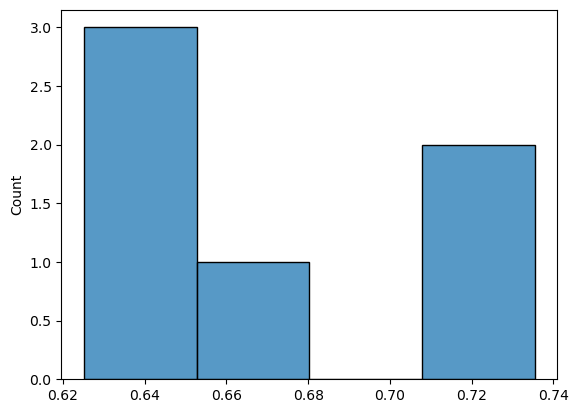

In [21]:
import seaborn as sns
sns.histplot(data=spacy_results)

########################################################################################################################
########################################################################################################################
########################################################################################################################


SentenceTransformer testing

########################################################################################################################

In [22]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("sentence-transformers/distiluse-base-multilingual-cased-v1")

C:\Anaconda\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
ST_sentences = best_vacancies_text['Description'].tolist()
#print(len(ST_sentences))
ST_sentence_embeddings = model.encode(ST_sentences)
ST_key_sentence_embedding = model.encode(choosen_text)

In [24]:
for sent, embed in zip(ST_sentences, ST_sentence_embeddings):
    print("Sentence:", sent)
    print("Embedding:", embed)
    print("")

Sentence: Обязанности. Программирование web-сервисов (backend, frontend). Поддерживать имеющиеся сервисы (backend, frontend). Программировать десктоп приложения JAVA. Поддерживать десктоп приложения JAVA. Требования. Java разработчик, опыт от 1 до 3 лет. Уверенное владение Java Core. Опыт разработки веб-проектов на базе технологий Java, Spring, Hibernate/JPA, REST API. Знание SQL и одной из реляционных СУБД. Опыт работы с системой контроля версий. Английский язык на уровне чтения документации. Будет преимуществом. Опыт работы с Linux. Опыт работы с одним из фронтенд-фреймворков React/Angular/Vue. Опыт написания unit-тестов. Условия. Официальное трудоустройство по ТК РФ с первого дня. График работы 5/2 с 00 до 00. Доставка к месту работы транспортом предприятия. Бесплатное питание. Дружелюбный коллектив, возможность развития. 
Embedding: [-2.23162817e-03 -1.41582815e-02  2.01876368e-02 -3.18472348e-02
  3.28315385e-02  9.96292681e-02  3.58037651e-02  6.59959987e-02
 -9.46726650e-03 -3.7

In [25]:
from sentence_transformers import SentenceTransformer, util
from scipy.spatial import distance
#import torch.nn
ST_results = np.empty([6])
Scipy_results = np.empty([6])
print('\nST util:')
i = 0
for sent in ST_sentence_embeddings:
    ST_results = 
    print(util.pytorch_cos_sim(sent, ST_key_sentence_embedding))
#print(util.pytorch_cos_sim(ST_sentence_embeddings[0], ST_key_sentence_embedding))
#print(util.pytorch_cos_sim(ST_sentence_embeddings[1], ST_key_sentence_embedding))
#print(util.pytorch_cos_sim(ST_sentence_embeddings[2], ST_key_sentence_embedding))
print('\nScipy distance:')
for sent in ST_sentence_embeddings:
    print(1 - distance.cosine(sent, ST_key_sentence_embedding))
#print(1 - distance.cosine(ST_sentence_embeddings[0], ST_key_sentence_embedding))
#print(1 - distance.cosine(ST_sentence_embeddings[1], ST_key_sentence_embedding))
#print(1 - distance.cosine(ST_sentence_embeddings[2], ST_key_sentence_embedding))


ST util:
tensor([[0.0746]])
tensor([[0.1811]])
tensor([[0.0280]])
tensor([[0.0332]])
tensor([[0.0245]])
tensor([[0.0056]])

Scipy distance:
0.07464312762022018
0.18110772967338562
0.027979055419564247
0.03317846730351448
0.024457352235913277
0.005557580851018429


In [26]:
import translators as ts
#_ = ts.preaccelerate_and_speedtest() 

In [29]:
print(ts.translate_text(ST_sentences[0]))
print(ts.translate_text(choosen_text))
len(ST_sentences[0])
print(ts.translate_text(ST_sentences[1]))

Duties. Programming of web services (backend, frontend). Maintain existing services (backend, frontend). Programming a JAVA desktop application. Support JAVA desktop applications. Requirements. Java developer, 1 to 3 years of experience. Proficiency in Java Core. Experience in developing web projects based on Java, Spring, Hibernate/JPA, REST API technologies. Knowledge of SQL and one of the relational DBMSs. Experience with version control systems. English at the level of reading documentation. Will be an advantage. Experience with Linux. Experience with one of the React/Angular/Vue front-end frameworks. Experience in writing unit tests. Conditions. Official employment according to the Labor Code of the Russian Federation from the first day. Work schedule 5/2 from 00 to 00. Delivery to the place of work by the company's transport. Free meals. Friendly team, opportunity for development.
Preparation of documents for the write-off of inventory used in the restoration of landscaping. Inpu

TranslatorError: 

In [3]:
import spacy
import translators as ts
import pandas as pd

spacy.cli.download('ru_core_news_md')

In [13]:
projects = pd.read_csv(
    "projects.csv",
    engine="python",
    usecols=['Info']
    )
print(projects)

                                                  Info
0    <p>Разработка фреймворка для алгоритмов федера...
1    <p>Личный кабинет студентов, аспирантов и сотр...
2    <p>Для нужд приёмной комиссии и Международного...
3    <p>&nbsp; Разработка фреймворка для алгоритмов...
4    <p>Разработка фреймворка для алгоритмов федера...
..                                                 ...
109  <p><strong>Мы – проектное бюро ЛУЧ – генеральн...
110  <p>Мы заинтересованы в &nbsp;привлечении талан...
111  <p>Мы заинтересованы в различных формах сотруд...
112  <p>Портал "Студентор" это сервис эффективного ...
113  <p>Проект посвящен работе с изображениями, пол...

[114 rows x 1 columns]


In [7]:
nlp = spacy.load("ru_core_news_md")

for p in projects["Info"]:
    doc = nlp(p)

    # Извлекаем ключевые слова на основе частоты
    #keywords_freq = [token.text for token in doc if not token.is_stop and token.is_alpha]
    
    # Извлекаем ключевые слова на основе веса встроенных векторов
    keywords_semantic = [token.text for token in doc if not token.is_stop and token.vector_norm > 6]
    
    #print("Keywords based on frequency:", keywords_freq)
    print("Keywords based on semantics:", keywords_semantic)

Keywords based on semantics: ['p', 'wiki', 'машинного', 'источниках', 'передачи', 'центр', 'обработки', 'технология', 'активно', 'множество', 'языке', 'for', 'языке', 'машинного', 'библиотеки', 'библиотеку', 'глубокого', 'проекте', 'инфраструктуры', 'библиотеки', 'протоколов', 'выполнением']
Keywords based on semantics: ['p', 'университета', 'центральная', 'цифровой', 'университета', 'объявлений', 'сервисы', 'запись', 'ключ', 'доступа', 'личным', 'кабинетом', 'начали', 'подготовительного', 'отделения', 'числу', 'пользователей', 'являющиеся', 'сервисов', 'командами', 'разработки', 'университета', 'сервисов', 'интерфейс', 'основе', 'подключения', 'уровнем']
Keywords based on semantics: ['p', 'нужд', 'офиса', 'автоматизировать', 'основе', 'имеющихся']
Keywords based on semantics: ['a', 'wiki', 'машинного', 'источниках', 'передачи', 'центр', 'обработки', 'технология', 'активно', 'множество', 'языке', 'for', 'языке', 'машинного', 'библиотеки', 'библиотеку', 'глубокого', 'проекте', 'обработк

In [10]:
from googletrans import Translator

In [11]:
translator = Translator()

In [12]:
meme = "안녕하세요."
result = translator.translate(meme, dest='en')
result.text

ConnectTimeout: timed out

In [12]:
import spacy
import pandas as pd
import re
import pke
from deep_translator import LingueeTranslator
from deep_translator import MyMemoryTranslator

n_projects = [];

for p in projects["Info"]:
    n_p = re.sub(r'\<[^>]*\>', '', p)
    nn_p = re.sub(r'&nbsp;', '', n_p)
    #print(nn_p)
    
    symbols_to_remove = ",!?.<>.()--./\\"
    for symbol in symbols_to_remove:
        nn_p = nn_p.replace(symbol, "")
    n_projects.append(nn_p)
    print(nn_p + '\n')



NameError: name 'projects' is not defined

In [19]:
clear_description_ru  = pd.DataFrame(n_projects, columns=['clear_description']) 

In [20]:
clear_description_ru

,clear_description
0,Разработка фреймворка для алгоритмов федератив...
1,Личный кабинет студентов аспирантов и сотрудни...
2,Для нужд приёмной комиссии и Международного ст...
3,Разработка фреймворка для алгоритмов федерати...
4,Разработка фреймворка для алгоритмов федератив...
...,...
109,Мы – проектное бюро ЛУЧ – генеральный проектир...
110,Мы заинтересованы в привлечении талантливых\n ...
111,Мы заинтересованы в различных формах сотруднич...
112,"Портал ""Студентор"" это сервис эффективного пои..."


In [16]:
from deep_translator import (GoogleTranslator, # perfect
                             ChatGptTranslator, # need api key 
                             MicrosoftTranslator, # need api key
                             PonsTranslator, # 0-50 symbols
                             LingueeTranslator, # 0-50 symbols
                             MyMemoryTranslator, # 0-500 symbols
                             YandexTranslator, # need api key +-
                             PapagoTranslator, # need api key
                             DeeplTranslator, # need api key
                             QcriTranslator,
                             single_detection,
                             batch_detection)
from translate import Translator # 500 CHARS

clear_description_en = []

for descr in clear_description_ru['clear_description']:
    translator= GoogleTranslator(from_lang="russian",to_lang="English")
    #descr = "Программа перевода" 
    text_Eng = translator.translate(descr)
    print(text_Eng)
    clear_description_en.append(text_Eng)

Development of a framework for federated learning algorithms https:tftwikiruwikiFederated_learning designed to perform analysis of machine learning data on distributed data sources without transferring them to a processing center. The technology was proposed in 2017 by Google Inc and is intended for training on Big Data in conditions where the data cannot be transferred to the cloud via due to poor communication or data privacy Currently, the technology is actively developing and many libraries appear in the Python language FATE PaddleFL TensorFlow Federate and others. Developed at St. Petersburg State Electrotechnical University "LETI" the FL4J Federated Learning for Java library is written in the Java language. It allows you to implement machine learning algorithms for execution in federated mode and connect other libraries, for example, the DL4J library for deep learning algorithms. This project requires improvement of the FL4J library infrastructure in terms of: protocol expansion,

In [2]:
from translate import Translator

translator= Translator(from_lang="russian",to_lang="English")
text_Rus = "Привет!"
text_Eng = translator.translate(text_Rus)
text_Eng

'Hi!'

In [28]:
import argostranslate.package
import argostranslate.translate

In [29]:
from_code = "ru"
to_code = "en"

# Download and install Argos Translate package
argostranslate.package.update_package_index()
available_packages = argostranslate.package.get_available_packages()
package_to_install = next(
    filter(
        lambda x: x.from_code == from_code and x.to_code == to_code, available_packages
    )
)
argostranslate.package.install_from_path(package_to_install.download())



In [11]:
clear_description_en = []

for descr in clear_description_ru['clear_description']:
    print('Длина текста: ', len(descr))
    translatedText = argostranslate.translate.translate(descr, from_code, to_code)
    clear_description_en.append(translatedText)
    print(translatedText)

NameError: name 'clear_description_ru' is not defined

In [11]:
clear_description_en

['Development of a framework for federated learning algorithms https:tftwikiruwikiFederated_learning designed to perform analysis of machine learning data on distributed data sources without their transfer to the processing center Technology proposed in 2017 by Google Inc. and designed for training on Big Data in conditions where data cannot be transmitted to the cloud due to poor communication or data privacy Currently, the technology is actively developing and many libraries appear in the Python FATE PaddleFL TensorFlow Federate language and others Developed in the FJETI library is designed to implement deep learning algorithms in this language;',
 'Personal Cabinet of postgraduate students and university employees - the central system in the entire digital environment of the University of LC provides intracorporate communication along with e-mail delivery of ads to students services of ordering application certificates and much more Account in the personal account - the key to acces

In [12]:
import pke

# initialize keyphrase extraction model, here TopicRank
#extractor = pke.unsupervised.TopicRank()
extractor = pke.unsupervised.MultipartiteRank() #MultipartiteRank 

answers = []

In [13]:
for text in clear_description_en: 
    # load the content of the document, here document is expected to be a simple 
    # test string and preprocessing is carried out using spacy
    extractor.load_document(input=text, language='en')
    
    # keyphrase candidate selection, in the case of TopicRank: sequences of nouns
    # and adjectives (i.e. `(Noun|Adj)*`)
    extractor.candidate_selection()
    
    # candidate weighting, in the case of TopicRank: using a random walk algorithm
    extractor.candidate_weighting()
    
    # N-best selection, keyphrases contains the 10 highest scored candidates as
    # (keyphrase, score) tuples
    keyphrases = extractor.get_n_best(n=10)
    answers.append(keyphrases)

In [36]:
# TopicRank()
answers

[[('data', 0.19132038971974935),
  ('federated', 0.09107052809751198),
  ('processing center technology', 0.07230072243602063),
  ('machine', 0.05847423295449737),
  ('conditions', 0.05615839144055306),
  ('analysis', 0.05225735701463323),
  ('algorithms https', 0.05160689260043873),
  ('framework', 0.05127548544321052),
  ('poor communication', 0.05093026479530558),
  ('transfer', 0.04778853001937965)],
 [('university employees', 0.10686573824000811),
  ('students services', 0.09765278302658666),
  ('personal cabinet', 0.08309442867885569),
  ('postgraduate students', 0.06449243645241763),
  ('central system', 0.0589851316662303),
  ('users', 0.05338361349781953),
  ('moodle openedx individual', 0.04488660406976582),
  ('ads', 0.044303116470904805),
  ('e-mail delivery', 0.043175971510088965),
  ('key', 0.04099896482933084)],
 [('applicants', 0.11638883082584055),
  ('data', 0.11498515073304261),
  ('students', 0.10773223903644986),
  ('filling', 0.10130316258538247),
  ('basis', 0.10

In [29]:
# YAKE()
answers

[[('python fate paddlefl', 0.00021201340937798398),
  ('fate paddlefl tensorflow', 0.00021201340937798398),
  ('paddlefl tensorflow federate', 0.00021201340937798398),
  ('tensorflow federate language', 0.00046835380367415464),
  ('data privacy currently', 0.000954685897692365),
  ('center technology proposed', 0.0010818199105556046),
  ('processing center technology', 0.0010818199105556048),
  ('implement deep learning', 0.0017056038767873773),
  ('distributed data sources', 0.0017595966905059773),
  ('federated learning algorithms', 0.0018593161279552163)],
 [('moodle openedx individual', 9.752732494630057e-05),
  ('including moodle openedx', 0.00016547338718787174),
  ('openedx individual trajectories', 0.00016825216892154177),
  ('individual trajectories schedule', 0.00016825216892154177),
  ('services including moodle', 0.0002791599316664738),
  ('entire digital environment', 0.0005022556443219552),
  ('provides intracorporate communication', 0.0005022556443219552),
  ('ordering a

In [14]:
# MultipartiteRank()
answers

[[('data', 0.15165301547103704),
  ('federated', 0.07531875266613838),
  ('machine', 0.06189769249785816),
  ('processing center technology', 0.059813168701230705),
  ('conditions', 0.054910533771717174),
  ('analysis', 0.051432824545086075),
  ('algorithms https', 0.05094240367673981),
  ('framework', 0.04968039920679723),
  ('transfer', 0.046302364830751834),
  ('training', 0.04110187057994732)],
 [('personal cabinet', 0.12218373589437428),
  ('university employees', 0.10771280471107095),
  ('postgraduate students', 0.09256849165907237),
  ('central system', 0.06072255304186105),
  ('students services', 0.06065948891032737),
  ('entire digital environment', 0.04064963853404438),
  ('ads', 0.03715313570816942),
  ('university', 0.036579743460488603),
  ('e-mail delivery', 0.03515762537195442),
  ('personal account', 0.03224575084273001)],
 [('applicants', 0.11638883082584053),
  ('data', 0.1149851507330426),
  ('students', 0.10773223903644985),
  ('filling', 0.10130316258538245),
  ('

# Собираю что работает

In [1]:
import spacy
import pandas as pd
import re
import pke
from deep_translator import LingueeTranslator
from deep_translator import MyMemoryTranslator

import argostranslate.package
import argostranslate.translate

import random
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

from sentence_transformers import SentenceTransformer

C:\Anaconda\envs\py38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
projects = pd.read_csv(
    "projects2.csv",
    engine="c",
    usecols=['Описание']
    )
print(projects)

                                              Описание
0    <p>Разработка фреймворка для алгоритмов федера...
1    <p>Личный кабинет студентов, аспирантов и сотр...
2    <p>Для нужд приёмной комиссии и Международного...
3    <p>&nbsp; Разработка фреймворка для алгоритмов...
4    <p>Разработка фреймворка для алгоритмов федера...
..                                                 ...
129  <p>Проект: Разработка системы помощи жителям г...
130  <p>В задачи отдела специальных работ Управлени...
131  <p>Отдел архитектурных и интеграционных решени...
132  <p>Отдел контроля сетевой инфраструктуры и дос...
133  <p>Отдел мониторинга информационной безопаснос...

[134 rows x 1 columns]


In [7]:
n_projects = [];

for p in projects["Описание"]:
    n_p = re.sub(r'\<[^>]*\>', '', p)
    nn_p = re.sub(r'&nbsp;', '', n_p)
    #print(nn_p)
    
    symbols_to_remove = ",!?.<>.()--./\\"
    for symbol in symbols_to_remove:
        nn_p = nn_p.replace(symbol, "")
    n_projects.append(nn_p)
    #print(nn_p + '\n')

clear_description_ru  = pd.DataFrame(n_projects, columns=['clear_description']) 
clear_description_ru

,clear_description
0,Разработка фреймворка для алгоритмов федератив...
1,Личный кабинет студентов аспирантов и сотрудни...
2,Для нужд приёмной комиссии и Международного ст...
3,Разработка фреймворка для алгоритмов федерати...
4,Разработка фреймворка для алгоритмов федератив...
...,...
129,Проект: Разработка системы помощи жителям горо...
130,В задачи отдела специальных работ Управления п...
131,Отдел архитектурных и интеграционных решений в...
132,Отдел контроля сетевой инфраструктуры и доступ...


In [8]:
clear_description_en = []

for descr in clear_description_ru['clear_description']:
    clear_description_en.append(descr)

In [9]:
from_code = "ru"
to_code = "en"

# Download and install Argos Translate package
argostranslate.package.update_package_index()
available_packages = argostranslate.package.get_available_packages()
package_to_install = next(
    filter(
        lambda x: x.from_code == from_code and x.to_code == to_code, available_packages
    )
)
argostranslate.package.install_from_path(package_to_install.download())

In [10]:
clear_description_en = []

for descr in clear_description_ru['clear_description']:
    print('Длина текста: ', len(descr))
    translatedText = argostranslate.translate.translate(descr, from_code, to_code)
    clear_description_en.append(translatedText)
    print(translatedText)

Длина текста:  1043
Development of a framework for federated learning algorithms https:tftwikiruwikiFederated_learning designed to perform analysis of machine learning data on distributed data sources without their transfer to the processing center Technology proposed in 2017 by Google Inc. and designed for training on Big Data in conditions where data cannot be transmitted to the cloud due to poor communication or data privacy Currently, the technology is actively developing and many libraries appear in the Python FATE PaddleFL TensorFlow Federate language and others Developed in the FJETI library is designed to implement deep learning algorithms in this language;
Длина текста:  1002
Personal Cabinet of postgraduate students and university employees - the central system in the entire digital environment of the University of LC provides intracorporate communication along with e-mail delivery of ads to students services of ordering application certificates and much more Account in the p

In [12]:
random_seed = 42
random.seed(random_seed)

torch.manual_seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(random_seed)

In [11]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
model = AutoModel.from_pretrained('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

In [13]:
all_array = []

for clear_description in clear_description_en:
    text = clear_description
    
    encoding = tokenizer.batch_encode_plus(
        [text],                    
        padding=True,              # Pad to the maximum sequence length
        truncation=True,           # Truncate to the maximum sequence length if necessary
        return_tensors='pt',      # Return PyTorch tensors
        add_special_tokens=True    # Add special tokens CLS and SEP
    )
    
    input_ids = encoding['input_ids']
    #print(f"Input ID: {input_ids}")
    attention_mask = encoding['attention_mask']
    #print(f"Attention mask: {attention_mask}")
    
    #-----------------------------------------
    
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        word_embeddings = outputs.last_hidden_state 
    
    #print(f"Shape of Word Embeddings: {word_embeddings.shape}")
    
    decoded_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
    #print(f"Decoded Text: {decoded_text}")
    
    tokenized_text = tokenizer.tokenize(decoded_text)
    #print(f"tokenized Text: {tokenized_text}")
    
    encoded_text = tokenizer.encode(text, return_tensors='pt')  # Returns a tensor
    #print(f"Encoded Text: {encoded_text}")
    
    sentence_embedding = word_embeddings.mean(dim=1)
     
    #print("Sentence Embedding:")
    #print(sentence_embedding)
    
    #print(f"Shape of Sentence Embedding: {sentence_embedding.shape}")
    
    cos_similarity_scores = []
    
    for clr_desc in clear_description_en:
        example_sentence = clr_desc
        example_encoding = tokenizer.batch_encode_plus(
            [example_sentence],
            padding=True,
            truncation=True,
            return_tensors='pt',
            add_special_tokens=True
        )
        example_input_ids = example_encoding['input_ids']
        example_attention_mask = example_encoding['attention_mask']
         
        # Generate embeddings for the example sentence
        with torch.no_grad():
            example_outputs = model(example_input_ids, attention_mask=example_attention_mask)
            example_sentence_embedding = example_outputs.last_hidden_state.mean(dim=1)
         
        # Compute cosine similarity between the original sentence embedding and the example sentence embedding
        similarity_score = cosine_similarity(sentence_embedding, example_sentence_embedding)
         
        # Print the similarity score
        print("Cosine Similarity Score:", similarity_score[0][0])
        cos_similarity_scores.append(similarity_score[0][0])
        
    all_array.append(cos_similarity_scores)

Cosine Similarity Score: 1.0
Cosine Similarity Score: 0.36080962
Cosine Similarity Score: 0.37280264
Cosine Similarity Score: 0.8871132
Cosine Similarity Score: 0.8579376
Cosine Similarity Score: 0.77808976
Cosine Similarity Score: 0.87890464
Cosine Similarity Score: 0.50399953
Cosine Similarity Score: 0.37368852
Cosine Similarity Score: 0.14962968
Cosine Similarity Score: 0.23048867
Cosine Similarity Score: 0.34378844
Cosine Similarity Score: 0.45627278
Cosine Similarity Score: 0.40246868
Cosine Similarity Score: 0.2917874
Cosine Similarity Score: 0.30048293
Cosine Similarity Score: 0.2405394
Cosine Similarity Score: 0.4415125
Cosine Similarity Score: 0.97362614
Cosine Similarity Score: 0.31554934
Cosine Similarity Score: 0.20726407
Cosine Similarity Score: 0.4279781
Cosine Similarity Score: 0.33375344
Cosine Similarity Score: 0.41945016
Cosine Similarity Score: 0.5673095
Cosine Similarity Score: 0.55761725
Cosine Similarity Score: 0.46979392
Cosine Similarity Score: 0.3712712
Cosine 

In [14]:
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    word_embeddings = outputs.last_hidden_state 

print(f"Shape of Word Embeddings: {word_embeddings.shape}")

Shape of Word Embeddings: torch.Size([1, 174, 384])


In [15]:
decoded_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
print(f"Decoded Text: {decoded_text}")

tokenized_text = tokenizer.tokenize(decoded_text)
print(f"tokenized Text: {tokenized_text}")

encoded_text = tokenizer.encode(text, return_tensors='pt')  # Returns a tensor
print(f"Encoded Text: {encoded_text}")

Decoded Text: The Information Security Monitoring Department of the Department of Executive Authorities of St. Petersburg (hereinafter – OMIB is engaged in monitoring the information security audit of the information systems of the executive authorities (hereinafter – OMIB) responds to and investigates the ISI incidents with the operation of the SIB (including the SIB) and the PTB student’s participation in the investigation of all the relevant products in the ISIB (hereinafter – MTI) is necessary for the student to study of the relevant issues in the investigation of the ISIB (hereinafter – the PTB) and the PTBR) – the student’s participation in the investigation of the relevant PTIB – the PTB (infoTB (herequireinafter – it is necessary for the investigation of the PTI)
tokenized Text: ['▁The', '▁Information', '▁Security', '▁Monitor', 'ing', '▁Department', '▁of', '▁the', '▁Department', '▁of', '▁Executive', '▁Author', 'ities', '▁of', '▁St', '.', '▁Petersburg', '▁(', 'here', 'ina', 'fte

In [16]:
for token, embedding in zip(tokenized_text, word_embeddings[0]):
    #print(f"Token: {token}")
    print(f"Embedding: {embedding}")
    print("\n")

Embedding: tensor([ 5.7907e-02, -4.6107e-01,  8.1381e-02, -6.4827e-01,  1.0234e-01,
         1.3726e-01,  3.9075e-01,  3.7514e-01, -1.1190e-01,  3.5019e-01,
         7.2918e-02,  4.9045e-01,  4.4725e-01,  1.8400e-01,  3.7823e-01,
        -5.9901e-01,  4.7877e-01, -4.1504e-02,  3.5643e-01, -3.8540e-01,
         1.0346e-02, -1.0461e-01, -2.7046e-02, -5.6631e-02, -1.2750e-01,
        -1.4797e-02,  3.5298e-02,  1.5400e-01,  1.2437e-01,  7.7063e-02,
        -2.8740e-01, -5.1687e-01,  1.4569e-01, -1.7855e-01, -2.0508e-01,
         1.4639e+00,  5.9953e-01, -3.1638e-01,  1.3935e-01, -2.8966e-01,
        -5.2471e-01,  1.8702e-01,  3.5513e-01,  3.4113e-01,  9.9226e-02,
        -2.3163e-01, -5.5448e-01, -5.3739e-01, -5.1382e-01,  9.9120e-03,
        -4.0829e-02, -3.4235e-01, -1.0873e-01,  1.7275e-01, -1.9421e-01,
         5.7231e-02,  2.5292e-01,  2.8717e-01,  5.7266e-01,  1.7912e-01,
         4.4923e-01,  1.3332e-01,  6.4679e-01,  8.0774e-02, -4.4308e-02,
         2.5333e-01,  1.6653e-01,  1.763

In [17]:
sentence_embedding = word_embeddings.mean(dim=1)
 
print("Sentence Embedding:")
print(sentence_embedding)

print(f"Shape of Sentence Embedding: {sentence_embedding.shape}")

Sentence Embedding:
tensor([[ 2.5986e-02,  5.7385e-02,  1.7624e-02, -1.2778e-01,  1.0904e-01,
          5.0654e-02, -7.3188e-02,  2.0557e-01, -5.0231e-02,  2.1270e-01,
          4.3689e-02, -6.2278e-02,  2.3698e-01,  8.9131e-02,  6.7524e-02,
         -1.3112e-01,  1.8674e-01, -1.2147e-01,  1.7193e-01, -9.3067e-03,
         -5.3319e-02, -9.0565e-02, -1.2630e-02, -6.8946e-02, -1.6157e-01,
         -1.0149e-01,  1.5405e-01, -3.1003e-02, -1.5823e-02, -9.2399e-02,
         -5.3976e-02, -2.1416e-01,  1.0982e-01, -5.6839e-03, -2.9895e-02,
          2.0286e-01,  2.8992e-01, -2.0170e-01,  8.2683e-02, -1.2310e-01,
         -1.5307e-01, -1.1911e-01,  1.5505e-01,  1.5373e-01, -3.3074e-02,
         -1.0151e-01, -2.7195e-01, -1.7330e-01, -4.5439e-01, -8.8635e-02,
         -2.3121e-02, -1.3621e-01,  4.2071e-02,  7.4872e-02, -3.2587e-02,
          1.7478e-01,  2.2022e-01,  5.3565e-02,  9.1440e-02,  1.1505e-01,
          1.7937e-01,  8.8417e-02, -3.2490e-01,  1.0039e-01, -1.3458e-02,
          1.1101e-

In [18]:
cos_similarity_scores = []

for clr_desc in clear_description_en:
    example_sentence = clr_desc
    example_encoding = tokenizer.batch_encode_plus(
        [example_sentence],
        padding=True,
        truncation=True,
        return_tensors='pt',
        add_special_tokens=True
    )
    example_input_ids = example_encoding['input_ids']
    example_attention_mask = example_encoding['attention_mask']
     
    # Generate embeddings for the example sentence
    with torch.no_grad():
        example_outputs = model(example_input_ids, attention_mask=example_attention_mask)
        example_sentence_embedding = example_outputs.last_hidden_state.mean(dim=1)
     
    # Compute cosine similarity between the original sentence embedding and the example sentence embedding
    similarity_score = cosine_similarity(sentence_embedding, example_sentence_embedding)
     
    # Print the similarity score
    print("Cosine Similarity Score:", similarity_score[0][0])
    cos_similarity_scores.append(similarity_score[0][0])

Cosine Similarity Score: 0.23861168
Cosine Similarity Score: 0.44045213
Cosine Similarity Score: 0.42667848
Cosine Similarity Score: 0.23821104
Cosine Similarity Score: 0.23167948
Cosine Similarity Score: 0.21271747
Cosine Similarity Score: 0.3099236
Cosine Similarity Score: 0.42552787
Cosine Similarity Score: 0.35970277
Cosine Similarity Score: 0.1708946
Cosine Similarity Score: 0.18583646
Cosine Similarity Score: 0.18606314
Cosine Similarity Score: 0.21846165
Cosine Similarity Score: 0.30889583
Cosine Similarity Score: 0.36596927
Cosine Similarity Score: 0.28907877
Cosine Similarity Score: 0.2865492
Cosine Similarity Score: 0.32397515
Cosine Similarity Score: 0.22380492
Cosine Similarity Score: 0.47205913
Cosine Similarity Score: 0.36576587
Cosine Similarity Score: 0.25068545
Cosine Similarity Score: 0.35245848
Cosine Similarity Score: 0.31668591
Cosine Similarity Score: 0.3037054
Cosine Similarity Score: 0.38829622
Cosine Similarity Score: 0.41161823
Cosine Similarity Score: 0.30202

In [19]:
df = pd.DataFrame(all_array)
df

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,133
0,1.000000,0.360810,0.372803,0.887113,0.857938,0.778090,0.878905,0.504000,0.373689,0.149630,...,0.629873,0.532574,0.168484,0.263353,0.350658,0.221949,0.326813,0.270415,0.350636,0.238612
1,0.360810,1.000000,0.458510,0.340936,0.311903,0.297129,0.341314,0.481825,0.228231,0.106813,...,0.442961,0.373334,0.434202,0.440812,0.425604,0.397431,0.329700,0.460010,0.477820,0.440452
2,0.372803,0.458510,1.000000,0.391609,0.309136,0.354701,0.321797,0.426729,0.372228,0.132935,...,0.427479,0.417501,0.388505,0.317841,0.386129,0.325493,0.320084,0.414009,0.429479,0.426678
3,0.887113,0.340936,0.391609,1.000000,0.918965,0.797878,0.780757,0.495131,0.383675,0.150193,...,0.665091,0.541525,0.184172,0.254846,0.360470,0.220281,0.280333,0.283847,0.372711,0.238211
4,0.857938,0.311903,0.309136,0.918965,1.000000,0.713470,0.745468,0.478624,0.367915,0.115647,...,0.612179,0.457784,0.121973,0.241579,0.306555,0.168239,0.280752,0.295348,0.358792,0.231679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.221949,0.397431,0.325493,0.220281,0.168239,0.255988,0.265618,0.298096,0.209371,-0.016134,...,0.356382,0.362576,0.363960,0.366654,0.476762,1.000000,0.270965,0.370262,0.410927,0.337297
130,0.326813,0.329700,0.320084,0.280333,0.280752,0.277329,0.367932,0.423897,0.431629,0.272060,...,0.463137,0.459750,0.461284,0.543613,0.511926,0.270965,1.000000,0.549411,0.594699,0.557048
131,0.270415,0.460010,0.414009,0.283847,0.295348,0.253043,0.282277,0.425901,0.478113,0.181040,...,0.473548,0.451902,0.430388,0.491384,0.491750,0.370262,0.549411,1.000000,0.786385,0.647874
132,0.350636,0.477820,0.429479,0.372711,0.358792,0.382346,0.385752,0.453281,0.526826,0.190024,...,0.548180,0.504219,0.398669,0.464982,0.528399,0.410927,0.594699,0.786385,1.000000,0.569865


In [20]:
df.to_csv('Cosine_Similarity_new.csv', index=False) 

In [22]:
df.to_excel('Cosine_Similarity_Score-PARAPRASE-ru.xlsx', index=False) 

In [25]:
clear_description_ru.clear_description[0]

'Разработка фреймворка для алгоритмов федеративного обучения https:tftwikiruwikiFederated_learning предназначенных для выполнения анализа данных машинного обучения на распределенных источниках данных без их передачи в центр обработки Технология предложена в 2017 году Google Inc и предназначена для обучения на Больших данных в условиях когда данные не могут передаваться в облако по причине плохой связи или приватности данных В настоящее время технология активно развивается и появляется множество библиотек на языке Python FATE PaddleFL TensorFlow Federate и дрРазработанная в СПбГЭТУ "ЛЭТИ" библиотека FL4J Federated Learning for Java написана на языке Java Она позволяет как реализовать алгоритмы машинного обучения для выполнения в федеративном режиме так и подключать другие библиотеки например библиотеку DL4J для алгоритмов глубокого обученияВ данном проекте требуется доработка инфраструктуры библиотеки FL4J в части:расширение протоколов взаимодействие клиентсерверного взаимодействия;план

In [32]:
clear_description_ru.clear_description[4]

'Разработка фреймворка для алгоритмов федеративного обучения https:tftwikiruwikiFederated_learning предназначенных для выполнения анализа данных машинного обучения на распределенных источниках данных без их передачи в центр обработки Технология предложена в 2017 году Google Inc и предназначена для обучения на Больших данных в условиях когда данные не могут передаваться в облако по причине плохой связи или приватности данных В настоящее время технология активно развивается и появляется множество библиотек на языке Python FATE PaddleFL TensorFlow Federate и дрРазработанная в СПбГЭТУ "ЛЭТИ" библиотека FL4J Federated Learning for Java написана на языке Java Она позволяет как реализовать алгоритмы машинного обучения для выполнения в федеративном режиме так и подключать другие библиотеки например библиотеку DL4J для алгоритмов глубокого обученияВ данном проекте требуется реализация на Java одного из известных алгоритмов машинного обучения в концепции федеративного обучения в рамках библиотек

In [8]:
import numpy as np

lst = [10,20,30,40,50]
vctr = np.array(lst)
vctr = np.array(lst)
print("Vector created from a list:")
print(vctr)


Vector created from a list:
[10 20 30 40 50]


# 26.04.2024

In [11]:
import spacy
import pandas as pd
import re
import pke
from deep_translator import LingueeTranslator
from deep_translator import MyMemoryTranslator

import argostranslate.package
import argostranslate.translate

import random
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

from sentence_transformers import SentenceTransformer

In [12]:
projects = pd.read_csv(
    "projects.csv",
    engine="python",
    usecols=['Info']
    )
print(projects)

                                                  Info
0    <p>Разработка фреймворка для алгоритмов федера...
1    <p>Личный кабинет студентов, аспирантов и сотр...
2    <p>Для нужд приёмной комиссии и Международного...
3    <p>&nbsp; Разработка фреймворка для алгоритмов...
4    <p>Разработка фреймворка для алгоритмов федера...
..                                                 ...
109  <p><strong>Мы – проектное бюро ЛУЧ – генеральн...
110  <p>Мы заинтересованы в &nbsp;привлечении талан...
111  <p>Мы заинтересованы в различных формах сотруд...
112  <p>Портал "Студентор" это сервис эффективного ...
113  <p>Проект посвящен работе с изображениями, пол...

[114 rows x 1 columns]


In [13]:
n_projects = [];

for p in projects["Info"]:
    n_p = re.sub(r'\<[^>]*\>', '', p)
    nn_p = re.sub(r'&nbsp;', '', n_p)
    #print(nn_p)
    
    symbols_to_remove = ",!?.<>.()--./\\"
    for symbol in symbols_to_remove:
        nn_p = nn_p.replace(symbol, "")
    n_projects.append(nn_p)
    #print(nn_p + '\n')

clear_description_ru  = pd.DataFrame(n_projects, columns=['clear_description']) 
clear_description_ru

,clear_description
0,Разработка фреймворка для алгоритмов федератив...
1,Личный кабинет студентов аспирантов и сотрудни...
2,Для нужд приёмной комиссии и Международного ст...
3,Разработка фреймворка для алгоритмов федерати...
4,Разработка фреймворка для алгоритмов федератив...
...,...
109,Мы – проектное бюро ЛУЧ – генеральный проектир...
110,Мы заинтересованы в привлечении талантливых\n ...
111,Мы заинтересованы в различных формах сотруднич...
112,"Портал ""Студентор"" это сервис эффективного пои..."


In [16]:
random_seed = 42
random.seed(random_seed)

torch.manual_seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(random_seed)

In [17]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
model = AutoModel.from_pretrained('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

In [24]:
tensors_array = []

for clear_description in clear_description_ru['clear_description']:
    text = clear_description
    
    encoding = tokenizer.batch_encode_plus(
        [text],                    
        padding=True,              # Pad to the maximum sequence length
        truncation=True,           # Truncate to the maximum sequence length if necessary
        return_tensors='pt',      # Return PyTorch tensors
        add_special_tokens=True    # Add special tokens CLS and SEP
    )
    
    input_ids = encoding['input_ids']
    print(f"Input ID: {input_ids}")
    attention_mask = encoding['attention_mask']
    print(f"Attention mask: {attention_mask}")
    tensors_array.append(input_ids)
    

Input ID: tensor([[     0,   7720,  78238,  31438,   2519,    130,  19159,    415,    518,
         143771,    559, 119039,  29283,   1270,  73981,   3975,     12,     18,
           2480,  13691,    882,  13691,  30154,    820,  27686,    454, 152538,
          54961,   1196,    518, 109677,  63893,  36129,  24863,   1270,  73981,
             29, 144675,   1196,  63946,   1214,  36129,   1093,   1725, 165022,
             49,  14909, 206227, 160015,    245,  95651,     59,     49,    505,
           8165,   1815,   8942,     35,  54961,     59,    518,  73981,     29,
          67421,   1009,  36129,     49,  40238,   4222,  49704,     77,   9072,
         180816,  49197,     49,  41111,  50504,    129,  89574,  63269,    312,
          20755,    637, 213350,     89,  36129,    417,  77828,   3699,  45482,
          30561,  29477,   4354,     35, 187112,  46212, 169461,     29, 121971,
         145581,    563,  35746,  22017,  19298,  69466,   5531,   4970,    919,
          17336,  

In [25]:
tensors_array

[tensor([[     0,   7720,  78238,  31438,   2519,    130,  19159,    415,    518,
          143771,    559, 119039,  29283,   1270,  73981,   3975,     12,     18,
            2480,  13691,    882,  13691,  30154,    820,  27686,    454, 152538,
           54961,   1196,    518, 109677,  63893,  36129,  24863,   1270,  73981,
              29, 144675,   1196,  63946,   1214,  36129,   1093,   1725, 165022,
              49,  14909, 206227, 160015,    245,  95651,     59,     49,    505,
            8165,   1815,   8942,     35,  54961,     59,    518,  73981,     29,
           67421,   1009,  36129,     49,  40238,   4222,  49704,     77,   9072,
          180816,  49197,     49,  41111,  50504,    129,  89574,  63269,    312,
           20755,    637, 213350,     89,  36129,    417,  77828,   3699,  45482,
           30561,  29477,   4354,     35, 187112,  46212, 169461,     29, 121971,
          145581,    563,  35746,  22017,  19298,  69466,   5531,   4970,    919,
           17336

# 17.05.2024

In [1]:
import spacy
import pandas as pd
import re
import pke
from deep_translator import LingueeTranslator
from deep_translator import MyMemoryTranslator

import argostranslate.package
import argostranslate.translate

import random
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

from sentence_transformers import SentenceTransformer

C:\Anaconda\envs\py38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
projects = pd.read_csv(
    "projects.csv",
    engine="python",
    usecols=['ID', 'Info']
    )
print(projects)

      ID                                               Info
0      1  <p>Разработка фреймворка для алгоритмов федера...
1      2  <p>Личный кабинет студентов, аспирантов и сотр...
2      3  <p>Для нужд приёмной комиссии и Международного...
3      4  <p>&nbsp; Разработка фреймворка для алгоритмов...
4      5  <p>Разработка фреймворка для алгоритмов федера...
..   ...                                                ...
109  111  <p><strong>Мы – проектное бюро ЛУЧ – генеральн...
110  112  <p>Мы заинтересованы в &nbsp;привлечении талан...
111  113  <p>Мы заинтересованы в различных формах сотруд...
112  114  <p>Портал "Студентор" это сервис эффективного ...
113  115  <p>Проект посвящен работе с изображениями, пол...

[114 rows x 2 columns]


In [18]:
n_projects = [];

for p in projects["Info"]:
    n_p = re.sub(r'\<[^>]*\>', '', p)
    nn_p = re.sub(r'&nbsp;', '', n_p)
    #print(nn_p)
    
    symbols_to_remove = ",!?.<>.()--./\\"
    for symbol in symbols_to_remove:
        nn_p = nn_p.replace(symbol, "")
    n_projects.append(nn_p)
    #print(nn_p + '\n')

clear_description_ru = pd.DataFrame(n_projects, columns=['clear_description']) 
testim = pd.merge(projects['ID'], clear_description_ru, left_index=True, right_index=True)
testim2 = testim['clear_description'].to_numpy()
testim2

array(['Разработка фреймворка для алгоритмов федеративного обучения https:tftwikiruwikiFederated_learning предназначенных для выполнения анализа данных машинного обучения на распределенных источниках данных без их передачи в центр обработки Технология предложена в 2017 году Google Inc и предназначена для обучения на Больших данных в условиях когда данные не могут передаваться в облако по причине плохой связи или приватности данных В настоящее время технология активно развивается и появляется множество библиотек на языке Python FATE PaddleFL TensorFlow Federate и дрРазработанная в СПбГЭТУ "ЛЭТИ" библиотека FL4J Federated Learning for Java написана на языке Java Она позволяет как реализовать алгоритмы машинного обучения для выполнения в федеративном режиме так и подключать другие библиотеки например библиотеку DL4J для алгоритмов глубокого обученияВ данном проекте требуется доработка инфраструктуры библиотеки FL4J в части:расширение протоколов взаимодействие клиентсерверного взаимодейств

In [20]:
import torch
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer

modelST = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
embeddingsST = modelST.encode(testim2)
# Понижение размерности с помощью PCA
pca_ST = PCA(n_components=3)
X_pca_ST = pca_ST.fit_transform(embeddingsST)
X_pca_ST

array([[-1.21633220e+00,  1.90368131e-01, -1.06987154e+00],
       [-1.06058288e+00, -4.11521107e-01, -3.14454854e-01],
       [-5.04447162e-01, -5.69445230e-02,  1.06597289e-01],
       [-1.02488017e+00, -7.86032602e-02, -8.17505419e-01],
       [-1.21633339e+00,  1.90368503e-01, -1.06987059e+00],
       [-1.06144083e+00, -2.18311831e-01, -6.81857884e-01],
       [-1.35043883e+00,  9.48690698e-02, -1.16443229e+00],
       [-6.97165310e-01, -1.99537709e-01, -3.50357741e-01],
       [-1.97268471e-01, -4.81683969e-01,  6.37751639e-01],
       [-5.51781058e-01, -4.03992347e-02,  7.75251687e-01],
       [-5.44339418e-01,  8.49683225e-01,  4.95874316e-01],
       [-5.97838819e-01,  9.33276951e-01,  1.61997095e-01],
       [-5.12551367e-01,  8.88003707e-01, -5.77510297e-01],
       [-6.08507693e-01,  1.59925848e-01,  2.04754472e-01],
       [ 5.86267591e-01, -2.01721415e-02,  6.80679679e-01],
       [ 8.85285974e-01,  5.43638587e-01,  2.67745972e-01],
       [ 5.97417772e-01,  3.84160072e-01

In [ ]:
projectsM = pd.read_csv(
    "projects.csv",
    engine="python",
    usecols=['ID']
    )

In [22]:
# Загрузка токенизатора и модели BERT
Berttokenizer = BertTokenizer.from_pretrained('bert-base-cased')
modelBert = BertModel.from_pretrained('bert-base-cased')

# Создание эмбеддингов для каждого текста
Bertembeddings = []
for text in testim2:
    # Преобразование текста в последовательность токенов
    tokens = Berttokenizer.encode(text, add_special_tokens=True)

    # Создание эмбеддингов из текста
    Bertembeddings.append(modelBert(torch.tensor([tokens]))[0])

# Понижение размерности эмбеддинга с помощью PCA
bert_pca = PCA(n_components=1)
X_pca_Bert = []
for embedding in Bertembeddings:
    # Отсоединение тензора от графического контекста PyTorch
    Bertembeddings = Bertembeddings.detach()

    # Уменьшение размерности эмбеддинга с помощью PCA
    X_pca_Bert.append(bert_pca.fit_transform(Bertembeddings[0].numpy()))


Token indices sequence length is longer than the specified maximum sequence length for this model (821 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The expanded size of the tensor (821) must match the existing size (512) at non-singleton dimension 1.  Target sizes: [1, 821].  Tensor sizes: [1, 512]